In [1]:
%load_ext autoreload
%autoreload 2

pattern = "pattern-6"

entrypoint = pattern
app_cwl_file = f"../cwl-workflow/{pattern}.cwl"

try:
    from docs.helpers import plot_cwl, wrap_cwl
except (ImportError, ModuleNotFoundError) as e:

    import os
    import sys

    module_path = os.path.abspath(os.path.join("."))  # or the path to your source code
    sys.path.insert(0, module_path)

from helpers import WorkflowViewer, WorkflowWrapper
from cwl_loader import dump_cwl
from IPython.display import Markdown, display
import json

In [2]:
wf = WorkflowViewer.from_file(app_cwl_file, entrypoint)

2025-09-05 14:49:34.737 | DEBUG    | cwl_loader:load_cwl_from_location:196 - Loading CWL document from ../cwl-workflow/pattern-6.cwl...
2025-09-05 14:49:34.738 | DEBUG    | cwl_loader:_load_cwl_from_stream:199 - Reading stream from ../cwl-workflow/pattern-6.cwl...


2025-09-05 14:49:34.763 | DEBUG    | cwl_loader:load_cwl_from_stream:173 - CWL data of type <class 'ruamel.yaml.comments.CommentedMap'> successfully loaded from stream
2025-09-05 14:49:34.764 | DEBUG    | cwl_loader:load_cwl_from_yaml:124 - Updating the model of type 'CommentedMap' to version 'v1.2'...
2025-09-05 14:49:34.772 | DEBUG    | cwl_loader:load_cwl_from_yaml:135 - Raw CWL document successfully updated to v1.2! Now converting to the CWL model...
2025-09-05 14:49:34.787 | DEBUG    | cwl_loader:load_cwl_from_yaml:143 - Raw CWL document successfully updated to v1.2! Now dereferencing the FQNs...
2025-09-05 14:49:34.788 | DEBUG    | cwl_loader:_clean_process:66 -   Cleaning Workflow pattern-6...
2025-09-05 14:49:34.789 | DEBUG    | cwl_loader:_clean_process:66 -   Cleaning CommandLineTool clt...
2025-09-05 14:49:34.790 | DEBUG    | cwl_loader:load_cwl_from_yaml:151 - CWL document successfully dereferenced!
2025-09-05 14:49:34.790 | DEBUG    | cwl_loader:_load_cwl_from_stream:207 -

## Application Package Pattern 6

The CWL includes: 

- one input parameter of type `Directory`
- there are no output parameters of type `Directory`

This scenario takes as input an acquisition, applies an algorithm and generates an output that is not a STAC Catalog

Implementation: derive the NDVI mean taking as input a Landsat-8/9 acquisition

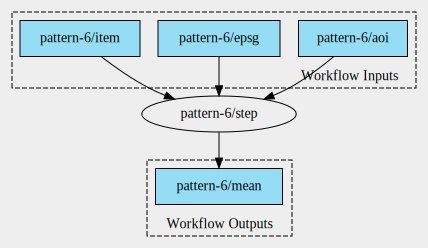

In [3]:
wf.plot()

### Inputs

In [4]:
wf.display_inputs()

| Id | Type | Label | Doc |
| --- | --- | --- | --- |
| `aoi` | `string` | area of interest | area of interest as a bounding box |
| `epsg` | `string` | EPSG code | EPSG code |
| `item` | `Directory` | Landsat-8/9 acquisition reference | Landsat-8/9 acquisition reference |


### Steps

In [5]:
wf.display_steps()

| Id | Runs | Label | Doc |
| --- | --- | --- | --- |
| `step` | `#clt` | None | None |


### Outputs

In [6]:
wf.display_outputs()

| Id | Type | Label | Doc |
| --- | --- | --- | --- |
| `mean` | `float` | Vegetation index mean | Vegetation index mean |


## Data flow management

In [7]:
w = WorkflowWrapper(workflow=wf.workflow, entrypoint=entrypoint)
wrapped = w.wrap()

app_cwl_file = f".{entrypoint}.cwl"

with open(app_cwl_file, "w") as f:
    dump_cwl(process=wrapped, stream=f)

2025-09-05 14:49:36.222 | DEBUG    | cwl_loader:load_cwl_from_location:196 - Loading CWL document from https://raw.githubusercontent.com/eoap/application-package-patterns/refs/heads/develop/templates/stage-in.cwl...


2025-09-05 14:49:36.290 | DEBUG    | cwl_loader:_load_cwl_from_stream:199 - Reading stream from https://raw.githubusercontent.com/eoap/application-package-patterns/refs/heads/develop/templates/stage-in.cwl...
2025-09-05 14:49:36.298 | DEBUG    | cwl_loader:load_cwl_from_stream:173 - CWL data of type <class 'ruamel.yaml.comments.CommentedMap'> successfully loaded from stream
2025-09-05 14:49:36.299 | DEBUG    | cwl_loader:load_cwl_from_yaml:124 - Updating the model of type 'CommentedMap' to version 'v1.2'...
2025-09-05 14:49:36.300 | DEBUG    | cwl_loader:load_cwl_from_yaml:135 - Raw CWL document successfully updated to v1.2! Now converting to the CWL model...
2025-09-05 14:49:37.482 | DEBUG    | cwl_loader:load_cwl_from_yaml:143 - Raw CWL document successfully updated to v1.2! Now dereferencing the FQNs...
2025-09-05 14:49:37.483 | DEBUG    | cwl_loader:_clean_process:66 -   Cleaning CommandLineTool my-asthonishing-stage-in-directory...
2025-09-05 14:49:37.484 | DEBUG    | cwl_loader:l

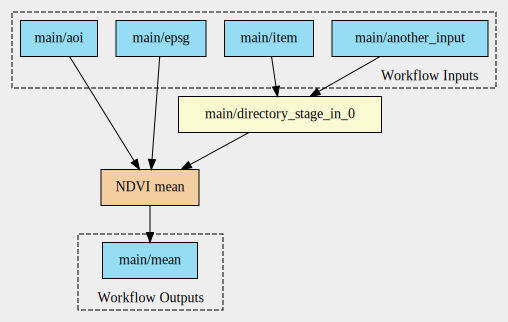

In [8]:
wf = WorkflowViewer(cwl_file=app_cwl_file, workflow=wrapped, entrypoint="main")

wf.plot()

### Workflow components diagram

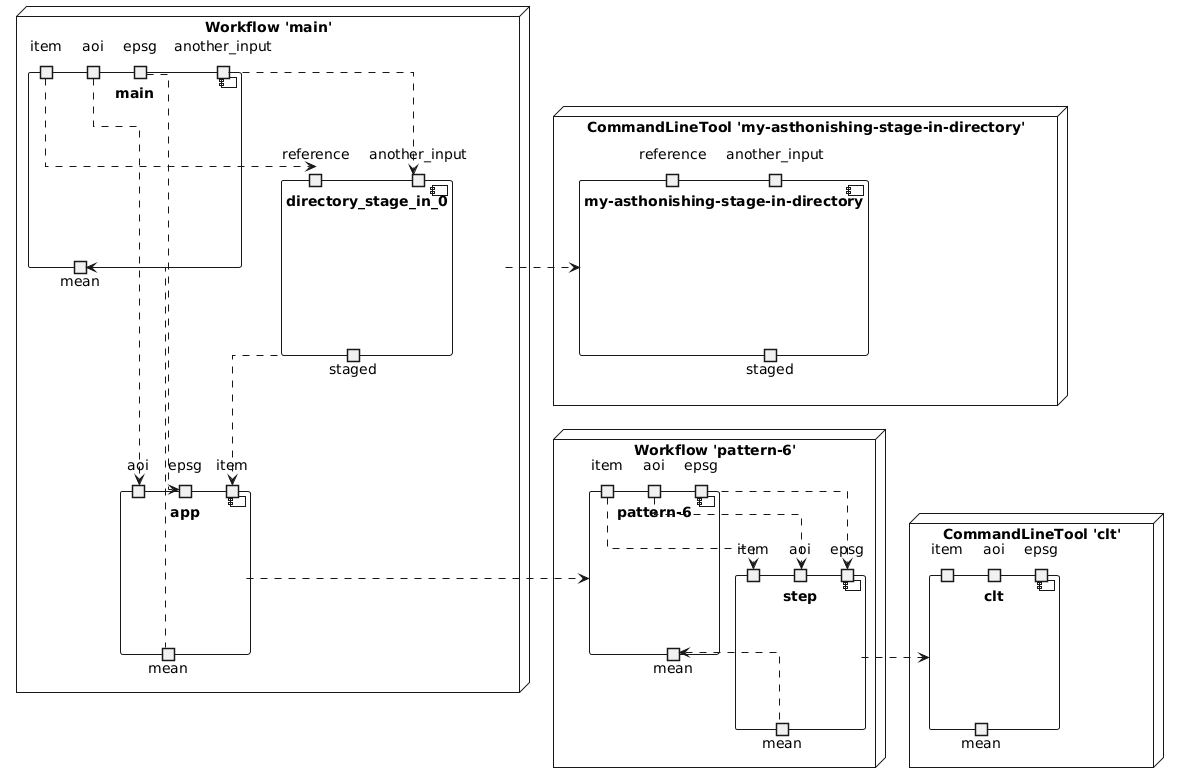

In [9]:
wf.display_components_diagram()

### Inputs

In [10]:
wf.display_inputs()

| Id | Type | Label | Doc |
| --- | --- | --- | --- |
| `aoi` | `string` | area of interest - pattern-6/aoi | area of interest as a bounding box - This parameter is derived from pattern-6/aoi |
| `epsg` | `string` | EPSG code - pattern-6/epsg | EPSG code - This parameter is derived from pattern-6/epsg |
| `another_input` | `string` | Another Input - my-asthonishing-stage-in-directory/another_input | An additional input for demonstration purposes - This parameter is derived from my-asthonishing-stage-in-directory/another_input |
| `item` | `https://raw.githubusercontent.com/eoap/schemas/main/string_format.yaml#URI` | Landsat-8/9 acquisition reference - pattern-6/item | Landsat-8/9 acquisition reference - This parameter is derived from pattern-6/item |


### Steps

In [11]:
wf.display_steps()

| Id | Runs | Label | Doc |
| --- | --- | --- | --- |
| `directory_stage_in_0` | `#my-asthonishing-stage-in-directory` | None | None |
| `app` | `#pattern-6` | None | None |


### Outputs

In [12]:
wf.display_outputs()

| Id | Type | Label | Doc |
| --- | --- | --- | --- |
| `mean` | `float` | Vegetation index mean - app/mean | Vegetation index mean - This output is derived from app/mean |


## Execution


In [13]:
from cwltool.main import main
from io import StringIO
import argparse
import yaml

In [14]:
params = {
    "aoi": "-118.985,38.432,-118.183,38.938",
    "epsg": "EPSG:4326",
    "item": {
        "class": "https://raw.githubusercontent.com/eoap/schemas/main/url.yaml#URL",
        "value": "https://planetarycomputer.microsoft.com/api/stac/v1/collections/landsat-c2-l2/items/LC08_L2SP_042033_20231007_02_T1",
    },
}
additional_params = {
    "another_input": "some_value",
    "s3_bucket": "my-bucket",
    "sub_path": "my/sub/path",
    "aws_access_key_id": "test",
    "aws_secret_access_key": "test",
    "region_name": "us-west-1",
    "endpoint_url": "https://s3.us-west-1.amazonaws.com",
}

with open(".params.yaml", "w") as f:
    yaml.dump({**params, **additional_params}, f)

md = f"""

### Inputs

```json
{json.dumps(params)}
```
"""

display(Markdown(md))



### Inputs

```json
{"aoi": "-118.985,38.432,-118.183,38.938", "epsg": "EPSG:4326", "item": {"class": "https://raw.githubusercontent.com/eoap/schemas/main/url.yaml#URL", "value": "https://planetarycomputer.microsoft.com/api/stac/v1/collections/landsat-c2-l2/items/LC08_L2SP_042033_20231007_02_T1"}}
```


In [15]:
parsed_args = argparse.Namespace(
    podman=False,
    debug=False,
    validate=False,
    outdir="./runs",
    workflow=f"{app_cwl_file}#main",
    job_order=[".params.yaml"],
)

stream_out = StringIO()
stream_err = StringIO()

res = main(
    args=parsed_args,
    stdout=stream_out,
    stderr=stream_err,
)

assert res == 0

md = f"""

### Outputs

```json
{stream_out.getvalue()}
```
"""

display(Markdown(md))



### Outputs

```json
{
    "mean": 0.07260978
}
```
